<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_voting/blob/main/Voting_Camila's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project 3: build predictive algorithms that predict the likelihood a person votes Democratic or Republican

# clone from repo
! git clone https://github.com/Catherine-Nguyen88/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 248 (delta 85), reused 132 (delta 72), pack-reused 90
Receiving objects: 100% (248/248), 70.74 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Updating files: 100% (68/68), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Load data
df = pd.read_csv('/content/project_voting/net_votes.csv')
df

,index,year,state,state_po,county_name,county_fips,office,candidatevotes,totalvotes,mode,...,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Republican,Total Democrat,Net Vote
0,0,2008,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,7607,15623,TOTAL,...,638,369,690,806,791,441,412,7833,7607,226
1,3,2008,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,29792,50984,TOTAL,...,1468,1038,1161,1884,1546,1470,1269,20576,29792,-9216
2,6,2008,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,3553,7369,TOTAL,...,400,216,391,398,282,302,308,3715,3553,162
3,9,2008,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,2488,6529,TOTAL,...,450,159,230,245,191,97,187,3970,2488,1482
4,12,2008,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,6094,14700,TOTAL,...,662,494,468,722,609,390,460,8470,6094,2376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1712,2020,VIRGINIA,VA,SUFFOLK CITY,51800,US PRESIDENT,28676,49642,ELECTION DAY,...,1730,1007,1568,1675,1441,767,971,20082,28676,-8594
529,1716,2020,VIRGINIA,VA,VIRGINIA BEACH CITY,51810,US PRESIDENT,117393,227717,ELECTION DAY,...,7650,5262,7194,8383,6687,4557,4465,105087,117393,-12306
530,1720,2020,VIRGINIA,VA,WAYNESBORO CITY,51820,US PRESIDENT,4961,10717,ELECTION DAY,...,390,191,477,434,453,369,458,5507,4961,546
531,1724,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,4790,6890,ELECTION DAY,...,278,64,317,312,251,297,83,1963,4790,-2827


In [5]:
print(df.shape)
df.head()

df.describe()

(3736, 13)


,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


In [6]:
df.columns

Index(['Unnamed: 0', 'year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidate', 'party', 'candidatevotes', 'totalvotes',
       'version', 'mode'],
      dtype='object')

In [7]:
# drop 'Unnamed: 0' column as it is not listed in the data dictionary and it serves no person.
df_data1 = df.loc[:,['year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidate', 'party', 'candidatevotes', 'totalvotes']]
df_data1.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes'],
      dtype='object')

In [8]:
# make sure na rows are dropped
train_final1 = df_data1.dropna()
na_count = train_final1.isna().sum()

print(na_count)

year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
dtype: int64


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [44]:
df = pd.read_csv('/content/project_voting/net_votes.csv', encoding = 'latin1', low_memory = False)

df['Intercept'] = np.ones(df.shape[0])

num_var = ['year','candidatevotes', 'totalvotes']
cat_var = ['county_name', 'county_fips','candidate', 'party']

df = df.loc[:,num_var+cat_var ]

KeyError: "['candidate', 'party'] not in index"

In [45]:
df.isnull().describe()

,index,year,state,state_po,county_name,county_fips,office,candidatevotes,totalvotes,mode,Not Hispanic or Latino: White alone,Not Hispanic or Latino: Black or African American alone,Not Hispanic or Latino: American Indian and Alaska Native alone,Not Hispanic or Latino: Asian alone,Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino: Two or more races,Hispanic or Latino,No schooling completed,Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Associate's degree,Bachelor's degree,Master's degree,Professional school degree,Doctorate degree,Under .50,.50 to .99,1.00 to 1.24,1.25 to 1.49,1.50 to 1.84,1.85 to 1.99,2.00 and over,Male: 18 and 19 years,Male: 20 years,Male: 21 years,Male: 22 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 and 61 years,Male: 62 to 64 years,Male: 65 and 66 years,Male: 67 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Male: 80 to 84 years,Male: 85 years and over,Female: 18 and 19 years,Female: 20 years,Female: 21 years,Female: 22 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 and 61 years,Female: 62 to 64 years,Female: 65 and 66 years,Female: 67 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 years and over,Total Republican,Total Democrat,Net Vote,Intercept
count,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533


<Axes: xlabel='candidatevotes', ylabel='year'>

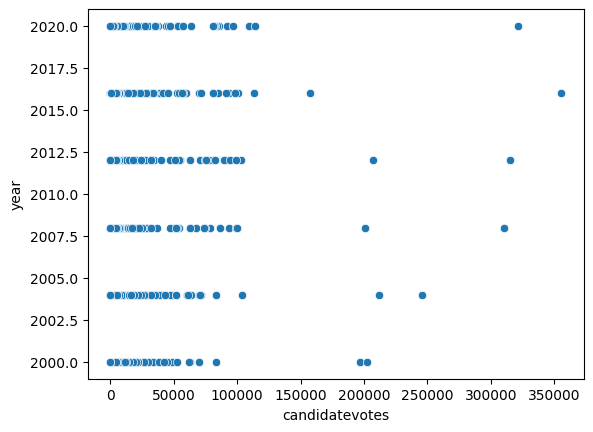

In [57]:
import seaborn as sns
sns.scatterplot(data=train_final1,x='candidatevotes',y='year')

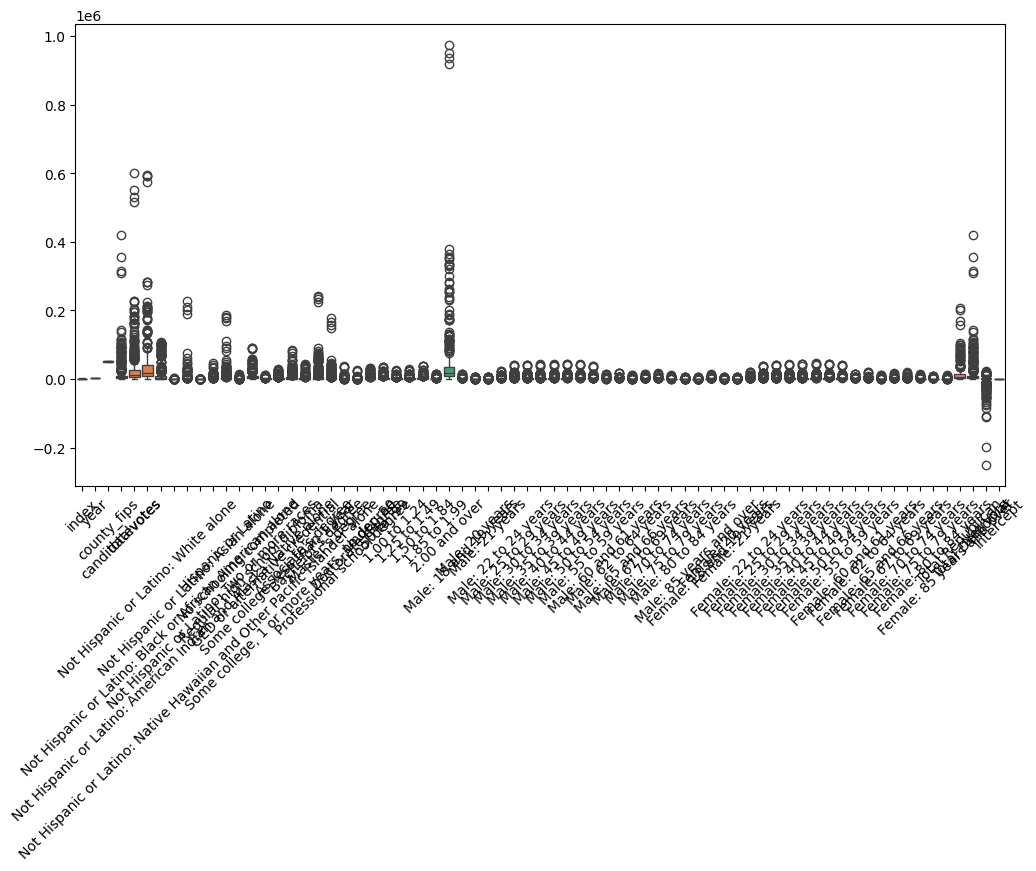

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

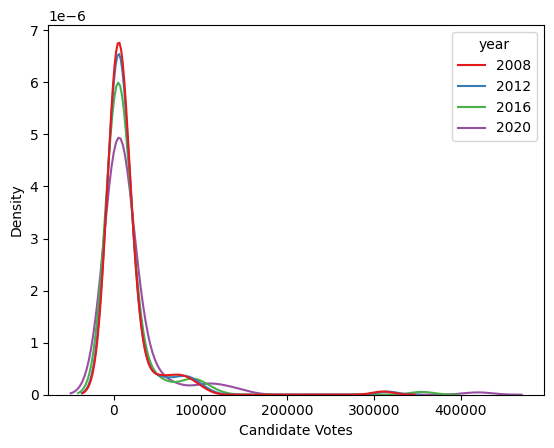

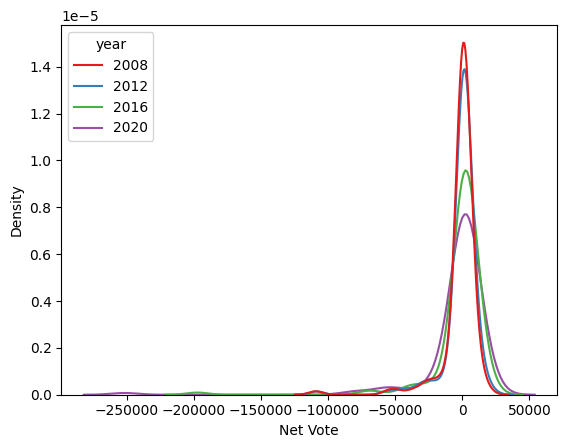

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for 'candidatevotes' with hue='year'
sns.kdeplot(data=df, x='candidatevotes', hue='year', palette='Set1')
plt.xlabel('Candidate Votes')
plt.ylabel('Density')
plt.show()

# KDE plot for 'Net Vote' with hue='year'
sns.kdeplot(data=df, x='Net Vote', hue='year', palette='Set1')
plt.xlabel('Net Vote')
plt.ylabel('Density')
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['Net Vote']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

KeyError: 'candidate'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.5583140877598153


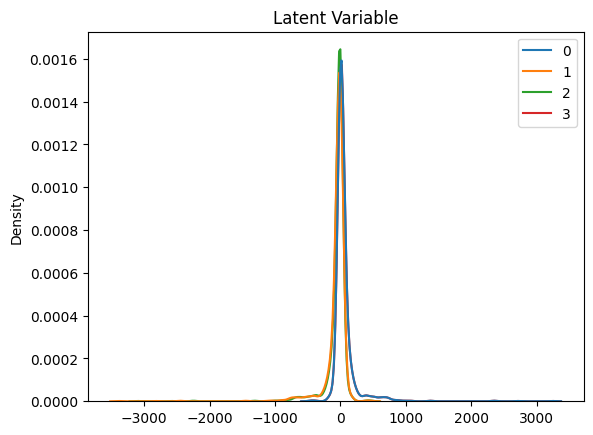

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


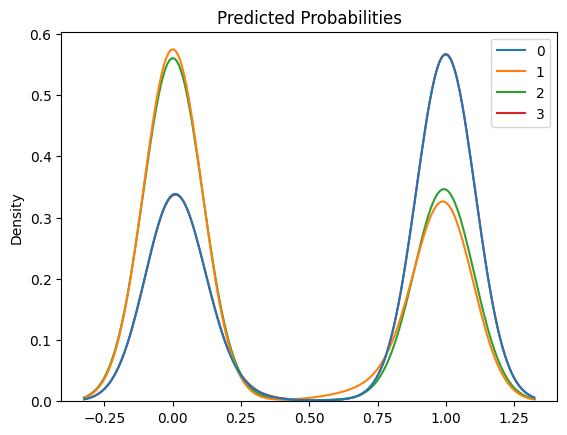

In [31]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['party']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

In [40]:
# scale data before feature selection
scaler = MinMaxScaler(feature_range=(0,1))
ddf_scale = df.drop("candidatevotes", axis=1)
ddf_scale = pd.DataFrame(scaler.fit_transform(ddf_scale), columns=ddf_scale.columns)

df_test_scale = df_test.drop("candidatevotes", axis=1)
df_test_scale = pd.DataFrame(scaler.fit_transform(df_test_scale), columns=df_test_scale.columns)


cor_df = ddf_scale.copy()
cor_df['candidatevotes'] = np.arcsinh(df['candidatevotes'])
cor_df.corr(method='kendall') # look for any relationships between variables. Use kendall coefficient to check for nonlinear relationship

ValueError: could not convert string to float: 'ACCOMACK'

<Axes: xlabel='candidatevotes', ylabel='Count'>

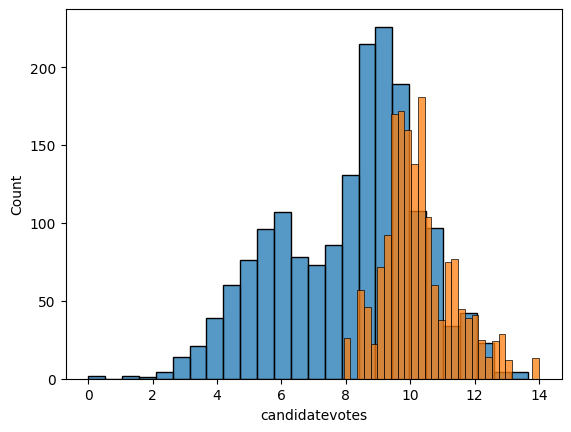

In [38]:
sns.histplot(np.arcsinh(df['candidatevotes']))

sns.histplot(np.arcsinh(df['totalvotes']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.5583140877598153


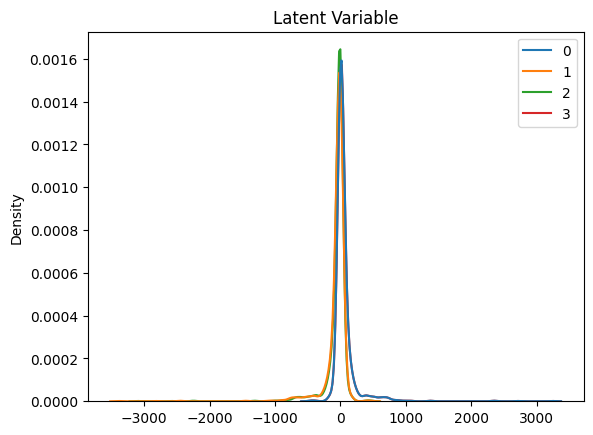

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


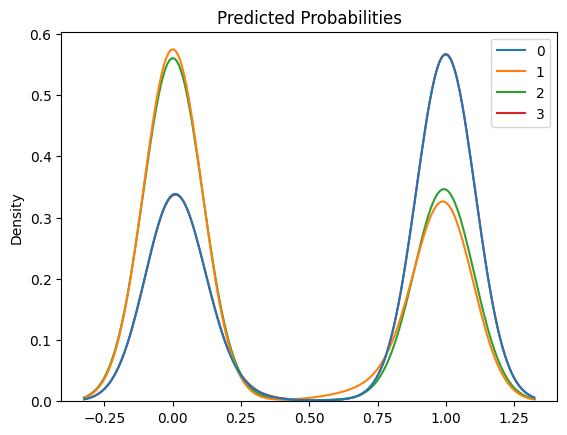

In [16]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['party']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.4618937644341801


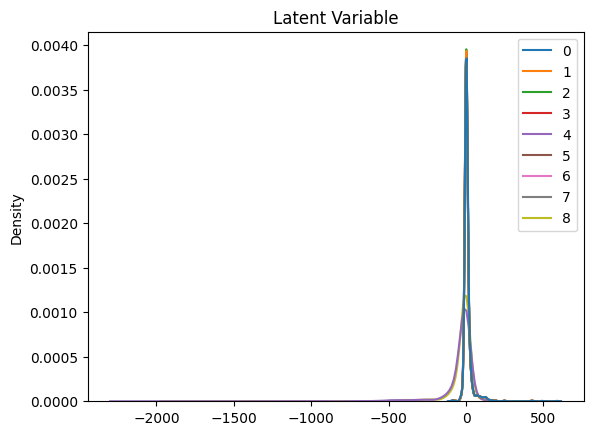

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


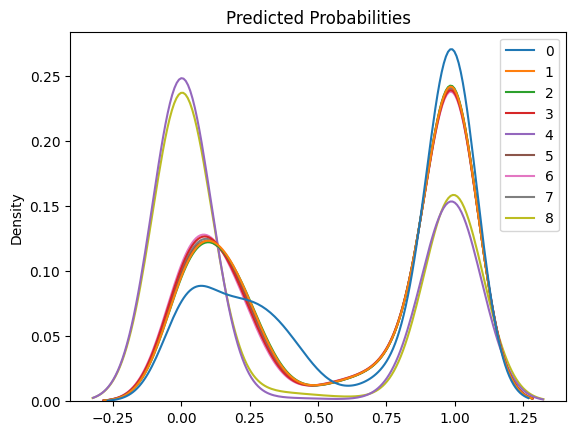

In [17]:
from sklearn.linear_model import LogisticRegression

# Outcome variable:
y = df['candidate']

# Create dummies:
X_n = df.loc[:,num_var]
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str)

# Fit logistic regression:
reg = LogisticRegression(fit_intercept=False).fit(X,y)
print('Accuracy: ', reg.score(X,y))

# Latent variable:
latent = np.matmul( X, reg.coef_.T  )
sns.kdeplot(latent).set_title('Latent Variable')
plt.show()

# Probability of default:
pr_hat = 1/(1+np.exp(-latent))
sns.kdeplot(pr_hat).set_title('Predicted Probabilities')
plt.show()

In [18]:
X = np.arange(-3.5,3.5,.1) # Create grid for plot

def F(L): # Logit distribution function
    p = 1/(1+np.exp(-L))
    return p

pr_logit = F(X) # Evaluate logit CDF on grid
pr_normal = norm.cdf(X) # Evaluate normal CDF on grid

# Plot:
plt.rcParams['text.usetex'] = True
plt.plot(X,pr_logit, label ='Logit CDF')
plt.plot(X, pr_normal, label='Normal CDF')
plt.xlabel("$b \cdot x$")
plt.ylabel("$F(b\cdot x)$")
plt.legend(loc='lower right')
plt.title('Logit and Normal CDFs')
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

**1) Merge Data**

**Uploading ID's Code to make Visualizations**

In [ ]:
#Testing demographic file
fname = './project_voting/data/county_data/0002_ds176_20105_county_E.csv'
dem = pd.read_csv(fname, encoding='latin-1')
dem.head()

#Drop first row
dem = dem.drop([0])
dem.head()

#Extracting Virginia data
dem_VA = dem[dem['STATE'] == 'Virginia']
print(dem_VA.shape) # the shape is correct for VA
dem_VA.head()

# modify the voting csv dataset to match the county names present in the demographics data
# change to title case and if the county doesnt end in "City", add "County"

def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = df.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))

voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']
voting_df.head()

# create merged dataframe
dem_VA = dem_VA.rename(columns={'COUNTY':'county_name'})
dem_VA.head()


(134, 272)


<ipython-input-39-f5205ea2edf5>:3: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,county_name,COUNTYA,COUSUBA,...,JSDE003,JSDE004,JSDE005,JSDE006,JSDE007,JSDE008,JSDE009,JSDE010,JS5E001,JTIE001
2821,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1,NaN,...,991,3212,3026,3261,2148,2025,899,4965,709.0,149800
2822,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3,NaN,...,5830,10158,7375,6827,3092,2070,816,3053,1031.0,349800
2823,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5,NaN,...,196,944,736,1478,1182,844,687,1849,504.0,104000
2824,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7,NaN,...,739,1173,839,1010,483,317,301,322,672.0,189800
2825,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9,NaN,...,704,2476,2409,2847,1599,1460,592,1454,582.0,142200


In [ ]:
#Final Merging
voting_original = pd.read_csv('./project_voting/data/voting_VA.csv')
voting_original.head(5)

# modify voting CSV
def match_county_name(county_name):
  if county_name.endswith('CITY'):
    return county_name.title()
  else:
    return county_name.title() + ' County'

voting_df = voting_original.copy()
voting_df['county_name'] = voting_df['county_name'].apply(lambda x: match_county_name(x))
voting_df.head()

# now, for each county, get candidatevotes/totalvotes
voting_df['fractionalvotes'] = voting_df['candidatevotes']/voting_df['totalvotes']

# split voting data into separate years for merging
voting_2000 = voting_df[voting_df['year']==2000]
voting_2004 = voting_df[voting_df['year']==2004]
voting_2008 = voting_df[voting_df['year']==2008]
voting_2012 = voting_df[voting_df['year']==2012]
voting_2016 = voting_df[voting_df['year']==2016]
voting_2020 = voting_df[voting_df['year']==2020]


**2) EDA**

In [ ]:
train_data = pd.read_csv('./project_voting/data/voting_VA.csv')
test_data = pd.read_csv('./project_voting/data/voting_VA.csv')

# clean training data
train_data1 = train_data.loc[:['county_fips', 'candidatevotes', 'totalvotes']]

##convert party to value?

train_final = train_data1
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:['county_fips', 'candidatevotes','totalvotes']]

test_final = test_data1
test_final1 = test_final.dropna()


InvalidIndexError: ['county_fips', 'candidatevotes', 'totalvotes']

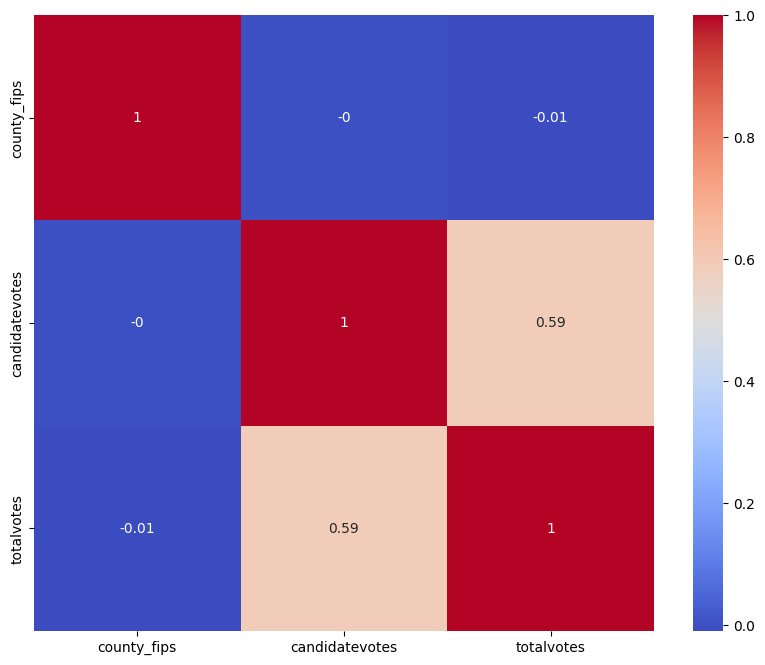

In [ ]:
corr_matrix = train_final.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

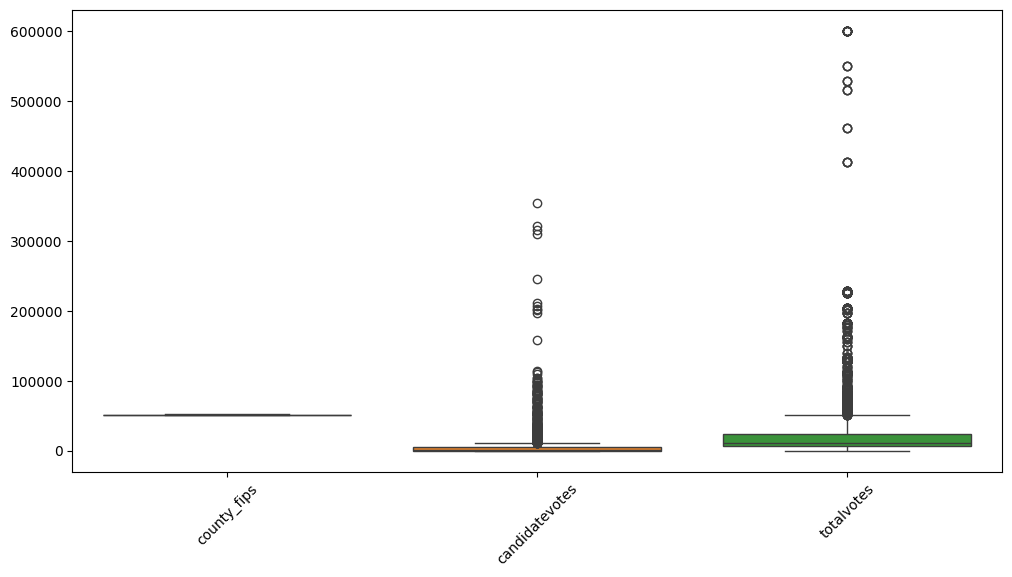

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_final)
plt.xticks(rotation=45)
plt.show()